In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as pl
import os


In [3]:
path = os.path.join('../data_samples/FuelConsumption.csv')
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]

cdf.head(7)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232


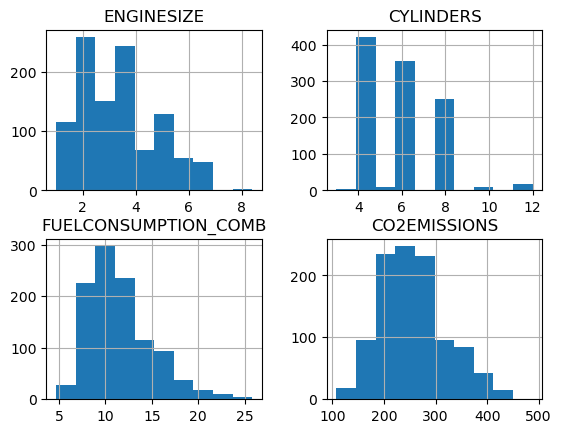

In [6]:
viz = cdf[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]
viz.hist()
plt.show()

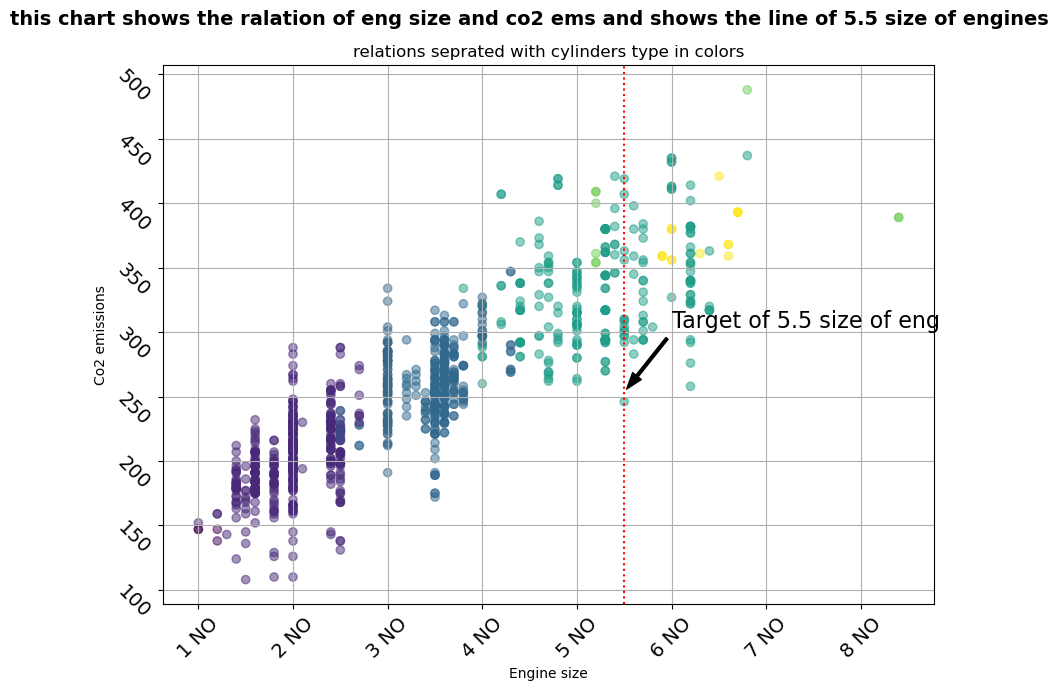

In [14]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'], alpha=.5, c=df['CYLINDERS'])
y_min, y_max = ax.get_ylim()
ax.annotate(
    'Target of 5.5 size of eng', 
    xy=(5.5, y_max/2),  
    xytext=(6, y_max/2 + 50),  
    arrowprops=dict(
        facecolor='black',
        shrink=0.05,
        width=2,
        headwidth=8
    ),
    size=16
)
ax.set(title='relations seprated with cylinders type in colors',
       xlabel='Engine size', 
       ylabel='Co2 emissions')
fig.suptitle('this chart shows the ralation of eng size and co2 ems and shows the line of 5.5 size of engines', 
             fontsize=14, 
             fontweight='bold')
ax.xaxis.set_major_formatter('{x:,.0f} NO')
ax.tick_params(axis='x', labelsize=14, labelrotation=45)
ax.tick_params(axis='y', labelsize=14 ,labelrotation=-45)
ax.axvline(5.5, color='red', linestyle=':')
ax.grid(True)
plt.tight_layout()
plt.show()

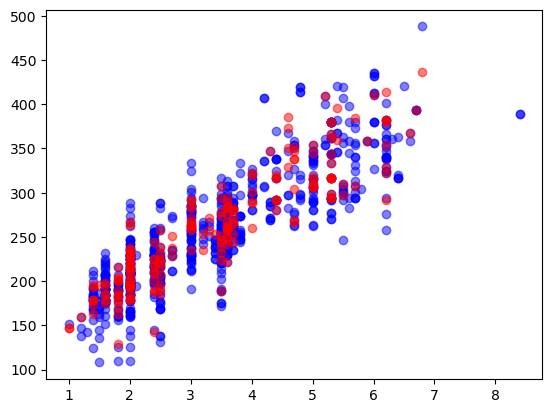

In [12]:


mask = np.random.rand(len(df)) < .8
train = cdf[mask]
test = cdf[~mask]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE , train.CO2EMISSIONS, color = 'blue' , alpha=.5)
ax1.scatter(test.ENGINESIZE , test.CO2EMISSIONS, color = 'red' , alpha=.5)
plt.show()


In [9]:
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


regr = linear_model.LinearRegression()
regr.fit(train_x , train_y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.02422309]]
Intercept:  [126.10073664]


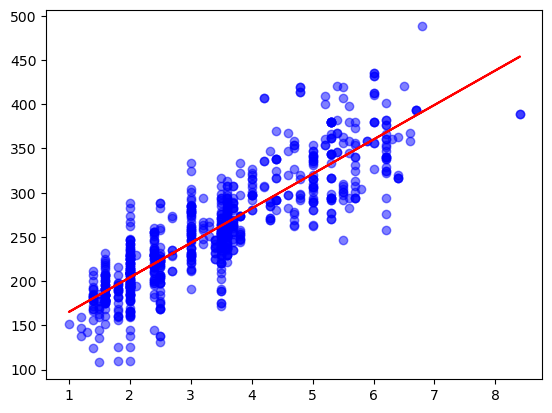

In [16]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS,  color='blue' , alpha=.5)
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0], '-r'  )
plt.ylabel='CO 2'
plt.xlabel='engine size'
plt.show()

In [11]:
from sklearn.metrics import r2_score

text_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(text_x) 

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))


Mean absolute error: 25.24
Residual sum of squares (MSE): 1174.07
R2-score: 0.75
